In [1]:
# thêm thư viện 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# đọc dữ liệu từ file csv
path = 'hoanh/demo.csv'
dataframe = pd.read_csv(path , encoding='latin-1')
dataframe.head(1000)

,ID,Date,Time,Page Name,AVR_Age,product_name,Category,Reaction,Comments,Share,Location,Review Rating
0,1,01/05/2022,10:15:00 PM,Bonolota,23,Shorts,Clothing,415,66,7.0,Maryland,3.3
1,2,01/06/2022,10:14:00 PM,Mystique Glint,67,Blouse,Clothing,388,65,49.0,Wisconsin,4.8
2,3,01/06/2022,9:37:00 PM,Face of Korea,23,Coat,Outerwear,689,436,428.0,Idaho,4.1
3,4,01/07/2022,4:58:00 PM,Khan Brothers,26,Sunglasses,Accessories,948,71,58.0,Wyoming,3.4
4,5,01/09/2022,11:03:00 PM,Carnesia,52,Shorts,Clothing,6000,2000,106.0,Indiana,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,12/30/2022,11:23:00 PM,Blue Dot Shopping,47,Shorts,Clothing,569,30,10.0,Kansas,2.9
996,997,12/30/2022,2:17:00 PM,Shaheba Fashion's Two,31,Skirt,Clothing,414,126,22.0,New York,5.0
997,998,12/31/2022,10:56:00 PM,RP Shopping Zone,68,Skirt,Clothing,735,54,13.0,Minnesota,4.4
998,999,12/31/2022,10:24:00 PM,Cloth Zone By Prema,51,Jeans,Clothing,637,40,18.0,Ohio,3.5


In [3]:
# Kiểm tra dữ liệu của cột Date
print(dataframe['Reaction'].dtype)

int64


loại sản phẩm mà khách hàng quan tâm có lượng reaction nhiều nhất trong năm 2022 

In [4]:
#tính tổng reaction của các loại sản phẩm
dataframe.groupby('Category').sum()['Reaction']

Category
Accessories     680768
Clothing       1241331
Footwear        534123
Outerwear       233930
Name: Reaction, dtype: int64

In [5]:
#số reaction cao nhất của một loại sản phẩm 
reaction_max = dataframe.groupby('Category').sum()['Reaction']
reaction_max.max()

1241331

In [6]:
#lấy tất cả các dữ liệu của bảng loại sản phẩm gắn vào 1 biến bất kì 
nhom4 = dataframe['Category'].unique()

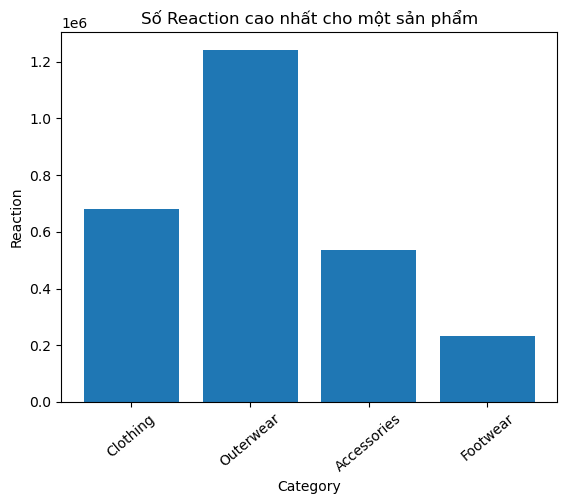

In [7]:
plt.bar(x=nhom4, height=reaction_max) 
plt.xticks(nhom4, rotation = 40) #tên các loại sản phẩm dưới cột và điều chỉnh chữ nghiêng
plt.xlabel('Category') # tên hàng ngang 
plt.ylabel('Reaction') # tên hàng dọc 
plt.title('Số Reaction cao nhất cho một sản phẩm')
plt.show()

 số lượng comments nhiều nhất của loại sản phẩm trên facebook  

In [8]:
#lấy các loại sản phẩm cùng loại và hiển thị tổng số comments của loại sản phẩm đó trong năm 2022
dataframe.groupby('Category').sum()['Comments']

Category
Accessories    409643
Clothing       685457
Footwear       248398
Outerwear      117339
Name: Comments, dtype: int64

In [9]:
#số comments cao nhất trong năm 2022
cmt_max = dataframe.groupby('Category').sum()['Comments']
cmt_max.max()

685457

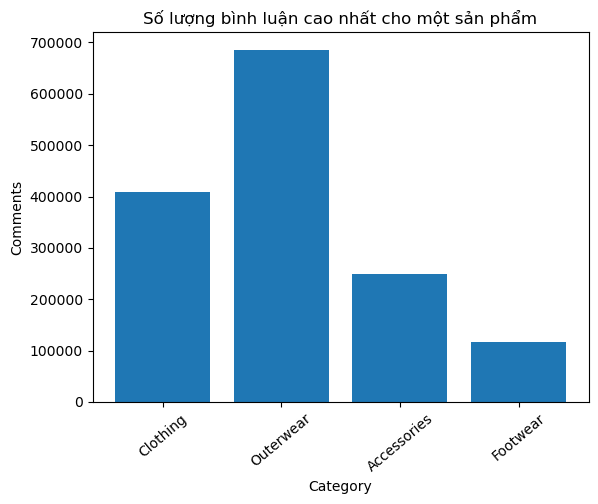

In [10]:
# lấy tất cả dữ liệu của loại sản phẩm vào 1 biến bất kì 
loaisp = dataframe['Category'].unique()

plt.bar(x = loaisp, height = cmt_max)
plt.xticks(loaisp, rotation = 40)
plt.xlabel('Category')
plt.ylabel('Comments')
plt.title('Số lượng bình luận cao nhất cho một sản phẩm')
plt.show()

số lượng của các loại sản phẩm theo tên là bao nhiêu 

In [11]:
#Đếm số lượng sản phẩm của các loại tên sản phẩm 
dataframe.groupby('Category').count()['product_name']

Category
Accessories    392
Clothing       556
Footwear       199
Outerwear      101
Name: product_name, dtype: int64

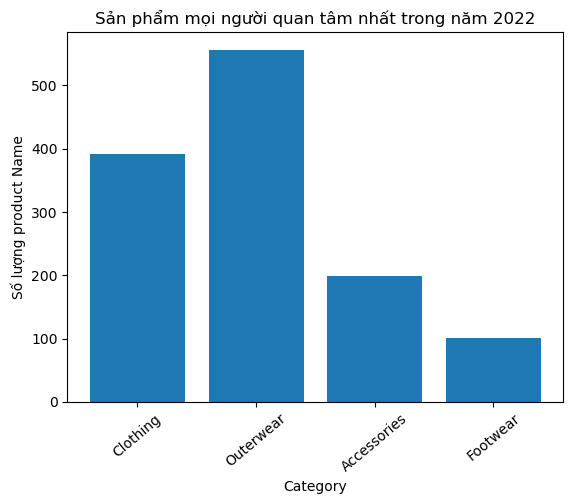

In [12]:
#gán giá trị của số lượng của 1 loại sản phẩm vào 1 biến bất kì 
sp = dataframe.groupby('Category').count()['product_name']
#gán tất cả các loại sản phẩm vào 1 biến bất kì 
namesp = dataframe['Category'].unique()

plt.bar(x = namesp, height = sp)
plt.xticks(namesp, rotation = 40)
plt.xlabel('Category')
plt.ylabel('Số lượng product Name')
plt.title('Sản phẩm mọi người quan tâm nhất trong năm 2022')
plt.show()

 Sản phẩm Clothing được độ tuổi nào quan tâm nhiều nhất?

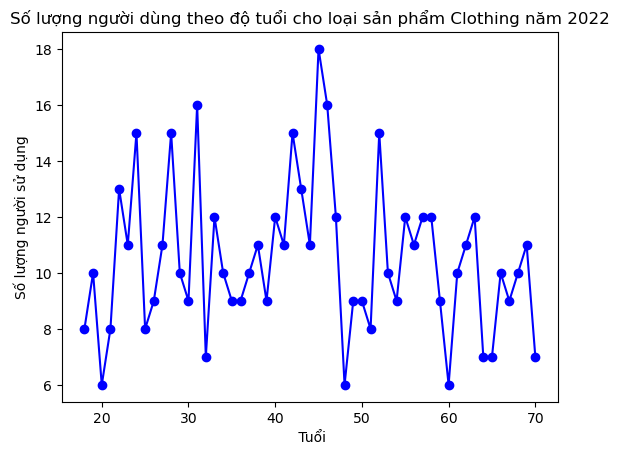

In [13]:
Clothing_pro = dataframe[dataframe['Category'] == 'Clothing']
AgeCount = Clothing_pro['AVR_Age'].value_counts()
AgeCount = Clothing_pro['AVR_Age'].value_counts().sort_index()

# Vẽ biểu đồ đường
AgeCount.plot.line(marker='o', linestyle='-', color='blue')

plt.title('Số lượng người dùng theo độ tuổi cho loại sản phẩm Clothing năm 2022')
plt.xlabel(' Tuổi')
plt.ylabel('Số lượng người sử dụng')
plt.show()

In [14]:
#hiển thị số tuổi của bảng AVR_AGE
print(set(dataframe['AVR_Age']))

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}


 Tính tổng tỷ lệ của từng đánh giá loại sản phẩm năm 2022

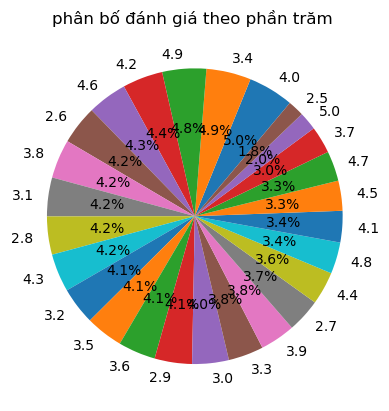

In [19]:
Age_sort = dataframe.sort_values(by='Review Rating')
Age_ratio = Age_sort['Review Rating'].value_counts(normalize=True)

# Tạo biểu đồ pie chart tổng hợp
Age_ratio.plot.pie(autopct='%1.1f%%', startangle=50)
plt.title('phân bố đánh giá theo phần trăm ')
plt.ylabel('')  
plt.show()